# Plotting predictions from models

In [3]:
import pickle
from electricity.model import TCN
import os
import argparse
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib import rc
from electricity.data import ElectricityDataSet
import numpy as np
import pandas as pd
import datetime

from torch.utils.data import DataLoader

AttributeError: module 'matplotlib.cbook' has no attribute '_classproperty'

### Styles

In [49]:
import matplotlib.pyplot as plt
from matplotlib import rc
cluster_style = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": False,
    "ytick.left": False,
}
ts_style = {
    "axes.spines.left": True,
    "axes.spines.right": False,
    "axes.spines.bottom": True,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": True,
    "ytick.left": True,
}
rc("text", usetex=True)
size=4.77/3

## Sneaking in some plotting

In [15]:
import pandas as pd
import numpy as np
df = pd.read_csv("Z:\TCN_clone\TCN\\representations\\representation_matrices\\revenue_sarima.csv", index_col=0).fillna(0)
df = df.set_index("id")
df = df.drop(columns=["sigma2"])
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df.values)
tsne = TSNE(n_components=2, n_iter=1000, verbose=1)
X_tsne = tsne.fit_transform(X_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 15229 samples in 0.024s...
[t-SNE] Computed neighbors for 15229 samples in 0.421s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15229
[t-SNE] Computed conditional probabilities for sample 2000 / 15229
[t-SNE] Computed conditional probabilities for sample 3000 / 15229
[t-SNE] Computed conditional probabilities for sample 4000 / 15229
[t-SNE] Computed conditional probabilities for sample 5000 / 15229
[t-SNE] Computed conditional probabilities for sample 6000 / 15229
[t-SNE] Computed conditional probabilities for sample 7000 / 15229
[t-SNE] Computed conditional probabilities for sample 8000 / 15229
[t-SNE] Computed conditional probabilities for sample 9000 / 15229
[t-SNE] Computed conditional probabilities for sample 10000 / 15229
[t-SNE] Computed conditional probabilities for sample 11000 / 15229
[t-SNE] Computed conditional probabilities for sample 12000 / 15229
[t-SNE] Computed conditional probabilities for sam

In [4]:
np.save("rep_sarima_revenue.npy", X_tsne)

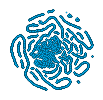

In [16]:
import numpy as np
X_tsne = np.load("rep_sarima_revenue.npy")
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=2,   linewidth=0.1)#clusters)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("Figures/representation_revenue_sarima.pdf", bbox_inches="tight")

### PCA

In [1]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("revenue/data/processed_companies.csv", index_col=0).fillna(0)
#X_scaled = StandardScaler().fit_transform(df.values.T)
#X_pca = PCA(n_components=10).fit_transform(X_scaled)
X_pca = PCA(n_components=10).fit_transform(df.values.T)
#X_tsne = TSNE(n_components=2, verbose=1).fit_transform(X_pca)


In [2]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], c = "#00B0F0", edgecolors="black", s=2,   linewidth=0.1)#clusters)
    plt.xticks([])
    plt.yticks([])
    #plt.savefig("Figures/representation_revenue_pca.pdf", bbox_inches="tight")

NameError: name 'plt' is not defined

In [3]:
from sklearn.cluster import KMeans, SpectralClustering
#clusters = KMeans(n_clusters=100).fit_predict(X_pca)
clusters = SpectralClustering(n_clusters=10).fit_predict(X_pca)

c:\Users\eriko\OneDrive - NTNU\ntnu\fag\prosjekt\TCN\plot_env\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [ ]:
import numpy as np
cluster_dist = {c: len(clusters[np.where(clusters == c)]) for c in range(len(set(clusters)))}
for k, v in cluster_dist.items():
    print(f"{k:2} : {v}")   
cluster_dict = {i: clusters[i] for i in range(len(clusters))}

In [58]:

c = 74
num_plotted=0
for i in range(15229):
    if cluster_dict[i] == c:
        print("Plotting ", i)
        num_plotted +=1
        if num_plotted == 10:
            print("breaking")
            break
        plt.plot(df.values.T[i])

Plotting  3120
Plotting  3263


TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\eriko\.matplotlib\tex.cache\30d1e4d852a35c2a1de6e311d6d17f04.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

### Learned embedding

In [17]:
from revenue.model import TCN

In [23]:
MODEL_PATH = "Z:\TCN_clone\TCN\\revenue\models\\56cb90e4c3c24f1da293cf86833d0fbc.pt"

In [26]:
import pickle
import torch
args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))

model = TCN(
    num_layers=args.num_layers,
    in_channels=1,
    out_channels=1,
    residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
    kernel_size=args.kernel_size,
    bias=args.bias,
    dropout=args.dropout,
    stride=1,
    leveledinit=args.leveledinit,
    embedding_dim=args.embedding_dim,
    embed=args.embed,
    num_embeddings=15229
)
model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
model.eval()

None


TCN(
  (tcn): TemporalConvolutionalNetwork(
    (net): Sequential(
      (0): ResidualBlock(
        (dcc1): DilatedCausalConv(1, 16, kernel_size=(4,), stride=(1,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,))
        (drop2): Dropout(p=0.2, inplace=False)
        (res_conv): Conv1d(1, 16, kernel_size=(1,), stride=(1,))
      )
      (1): ResidualBlock(
        (dcc1): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(2,))
        (drop2): Dropout(p=0.2, inplace=False)
      )
      (2): ResidualBlock(
        (dcc1): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop1): Dropout(p=0.2, inplace=False)
        (dcc2): DilatedCausalConv(16, 16, kernel_size=(4,), stride=(1,), dilation=(4,))
        (drop2): Dropout(p=0.2, inplace=Fa

In [27]:
ids = [i for i in range(370)]
embds = model.embedding(torch.LongTensor(ids)).detach().cpu().numpy()

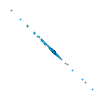

In [30]:
with plt.style.context(cluster_style):
    plt.figure(figsize=(size, size))
    plt.scatter(embds[:,0], embds[:,1], c = "#00B0F0", edgecolors="black", s=2,   linewidth=0.1)
    plt.xticks([])
    plt.yticks([])
    plt.savefig("Figures/representation_revenue_learned.pdf", bbox_inches="tight")

array([0.95185171, 0.03334781])

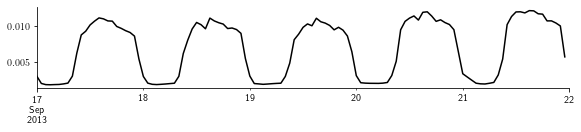

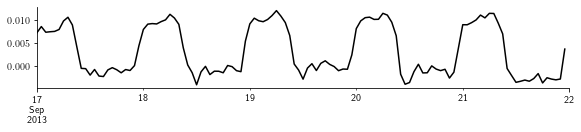

In [186]:
X = np.load("electricity/data/electricity.npy")
pca = PCA(n_components=2).fit(X)
with plt.style.context(ts_style):
    for i in [0,1]:
        df1 = pd.DataFrame({"X":pca.components_[i]})
        df1.index = pd.date_range(start="2012-01-01", freq="H", periods = X.shape[1])
        df1 = df1[15000:15120]
        ax = df1.plot(figsize=(2*4.77, 1.5), legend=False, c="black")
        x1, x2 = ax.get_xlim()
        ax.set_xlim((x1, x2 + 1))
        #plt.title(f"{i}")
        plt.savefig(f"Figures/electricity_pca_{i}.pdf", bbox_inches="tight")
pca.explained_variance_ratio_

In [171]:
prototypes = np.load("prototypes/prototypes_matrices/electricity_pca_scaled__nc_10_euclidean_Spectral_clustering_nc_10.npy")[:,-168]
prototypes.shape

(10, 26112)

In [174]:
mf_X = np.load("Z:\TCN_clone\deepglo\X.npy")
mf_X.shape

(64, 25945)

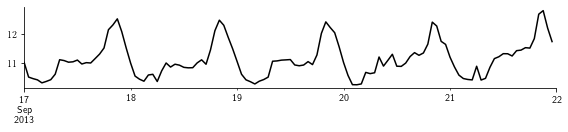

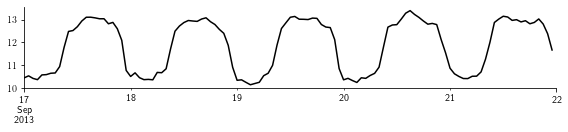

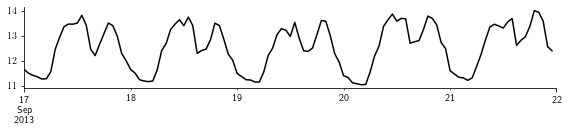

In [184]:
ids = [12, 22, 46]
with plt.style.context(ts_style):
    for i in ids:
        df1 = pd.DataFrame({"X":mf_X[i]})
        df1.index = pd.date_range(start="2012-01-01", freq="H", periods = mf_X.shape[1])
        df1 = df1[15000:15120]
        ax = df1.plot(figsize=(2*4.77, 1.5), legend=False, c="black")
        x1, x2 = ax.get_xlim()
        ax.set_xlim((x1, x2 + 1))
        #plt.title(f"{i}")
        plt.savefig(f"Figures/deepglo_mf_{i}.pdf", bbox_inches="tight")

In [35]:
model_dir = "Z:\TCN_clone\TCN\electricity\models"
model_names = [
    "8e083e2c7751418587a58a960a7ac3fd", # tcn
    "ce17bfb7d3594816a20faa55795a8084", # tcn + embd
    "71ba6af0637147dfa63db3190422ade2", # tcn + clustering
    #"685b978096594f229009a3cfdca2092d", # deepglo
    #"test_clustering",
]
model_paths = [f"{os.path.join(model_dir, mn)}.pt" for mn in model_names]
model_paths

['Z:\\TCN_clone\\TCN\\electricity\\models\\8e083e2c7751418587a58a960a7ac3fd.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\ce17bfb7d3594816a20faa55795a8084.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\71ba6af0637147dfa63db3190422ade2.pt']

### One channel models

In [36]:
models = []
for MODEL_PATH in model_paths[:2]:
    args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))
    print(MODEL_PATH)


    model = TCN(
        num_layers=args.num_layers,
        in_channels=1,
        out_channels=1,
        residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
        kernel_size=args.kernel_size,
        bias=args.bias,
        dropout=args.dropout,
        stride=1,
        leveledinit=args.leveledinit,
        embedding_dim=args.embedding_dim,
        embed=args.embed,
    )
    model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
    model.eval()
    models.append(model)

Z:\TCN_clone\TCN\electricity\models\8e083e2c7751418587a58a960a7ac3fd.pt
Z:\TCN_clone\TCN\electricity\models\ce17bfb7d3594816a20faa55795a8084.pt


### Two channel models

In [37]:
for MODEL_PATH in model_paths[2:]:
    args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))
    print(MODEL_PATH)

    model = TCN(
        num_layers=args.num_layers,
        in_channels=2,
        out_channels=1,
        residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
        kernel_size=args.kernel_size,
        bias=args.bias,
        dropout=args.dropout,
        stride=1,
        leveledinit=args.leveledinit,
        embedding_dim=args.embedding_dim,
        embed=args.embed,
    )
    model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
    model.eval()
    models.append(model)

Z:\TCN_clone\TCN\electricity\models\71ba6af0637147dfa63db3190422ade2.pt


## Dataset - rolling val

In [38]:
ds_train = ElectricityDataSet(
        file_path="electricity/data/electricity.npy",
        data_scale=True,
        data_scaler=None,
        start_date="2012-01-01",  # yyyy-mm-dd
        end_date="2014-05-26",  # yyyy-mm-dd,
        cluster_covariate=True,
        cluster_dict_path="Z:\TCN_clone\TCN\prototypes\cluster_dicts\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.pkl",
        prototypes_file_path="Z:\TCN_clone\TCN\prototypes\prototypes_matrices\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.npy"
)

Dimension of X :  torch.Size([370, 1, 21048])
Dimension of Y :  torch.Size([370, 1, 21048])


In [39]:
ds_scaled = ElectricityDataSet(
        file_path="electricity/data/electricity.npy",
        data_scale=True,
        data_scaler=ds_train.data_scaler,
        start_date="2014-12-08",  # yyyy-mm-dd
        end_date="2014-12-23",  # yyyy-mm-dd
        cluster_covariate=True,
        receptive_field=200,
        cluster_dict_path="Z:\TCN_clone\TCN\prototypes\cluster_dicts\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.pkl",
        prototypes_file_path="Z:\TCN_clone\TCN\prototypes\prototypes_matrices\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.npy"
)
ds_unscaled = ElectricityDataSet(
        file_path="electricity/data/electricity.npy",
        data_scale=False,
        data_scaler=ds_train.data_scaler,
        start_date="2014-12-08",  # yyyy-mm-dd
        end_date="2014-12-23",  # yyyy-mm-dd
        cluster_covariate=True,
        receptive_field=200,
        cluster_dict_path="Z:\TCN_clone\TCN\prototypes\cluster_dicts\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.pkl",
        prototypes_file_path="Z:\TCN_clone\TCN\prototypes\prototypes_matrices\electricity_pca_scaled_nc_10_euclidean_KMeans_nc_10.npy"
)

Dimension of X :  torch.Size([370, 1, 384])
Dimension of Y :  torch.Size([370, 1, 384])
Dimension of X :  torch.Size([370, 1, 384])
Dimension of Y :  torch.Size([370, 1, 384])


In [40]:
dl = DataLoader(dataset=ds_scaled, batch_size=370, shuffle=False, num_workers=0)

In [41]:
iter(dl).next()[0].shape

torch.Size([370, 2, 384])

In [44]:
dglo_preds = np.load("Z:\TCN_clone\deepglo\predicted_values.npy")
dglo_preds.shape

(370, 168)

In [45]:
ids = [0,1,2, 16, 176, 316]
two_channels = [False, False, True]
dfs = []
ds = [{} for _ in range(len(ids))]
print(ds)
x, y, idx, idx_row = iter(dl).next()
for j, model in enumerate(models):
    print(j)
    with torch.no_grad():
        if two_channels[j]:
            preds, _ = model.rolling_prediction(x=x[ids,:,:], emb_id=idx_row, tau=24, num_windows=7)
        else:
            preds, _ = model.rolling_prediction(x=x[ids,0,:].unsqueeze(1), emb_id=idx_row, tau=24, num_windows=7)
        print(preds)
        predictions_rescaled = preds.cpu().numpy()
        predictions_rescaled = ds_train.data_scaler.inverse_transform(predictions_rescaled.T).T
        for i in range(len(ids)):
            ds[i][f"model{j}"] = predictions_rescaled[ids[i]]
        
for i in range(len(ids)):
    ds[i][f"real"] = real_values = ds_unscaled.X[ids[i], 0, -7*24 :]
    ds[i]["dglo"] = dglo_preds[i,:]
    df = pd.DataFrame(ds[i])
    df.index  = pd.date_range(start="2014-12-16", freq='H', periods=24*7)
    dfs.append(df)

[{}, {}, {}, {}, {}, {}]
0
tensor([[-4.6026e-01, -4.7007e-01, -4.6717e-01,  ..., -4.2616e-01,
         -4.3314e-01, -4.4376e-01],
        [-1.4264e+00, -1.5814e+00, -1.6808e+00,  ..., -5.2900e-01,
         -8.0065e-01, -1.0361e+00],
        [-1.9690e-01, -1.9780e-01, -1.9749e-01,  ..., -2.0428e-01,
         -2.0645e-01, -2.0653e-01],
        ...,
        [ 1.6627e+00,  8.1194e-01, -1.5730e-03,  ...,  1.5284e+00,
          1.7807e+00,  1.6303e+00],
        [-9.8473e-01, -8.8354e-01, -7.6303e-01,  ..., -2.8946e-01,
         -4.7254e-01, -6.6052e-01],
        [ 9.9219e-01,  9.8333e-01,  9.7582e-01,  ...,  1.1485e+00,
          1.0643e+00,  1.0851e+00]])
1
tensor([[-0.4758, -0.4779, -0.4750,  ..., -0.4472, -0.4659, -0.4849],
        [-1.4582, -1.6201, -1.7072,  ..., -0.5915, -0.8576, -1.1145],
        [-0.1993, -0.2016, -0.1999,  ..., -0.1969, -0.1979, -0.1978],
        ...,
        [ 1.7214,  0.8058, -0.0117,  ...,  1.3763,  1.6566,  1.5817],
        [-0.9753, -0.8560, -0.7490,  ..., -0.2

In [111]:
all_dfs = []
for d in ds:
    df = pd.DataFrame(d)
    #df = df.drop(columns=["dglo"])
    df.index  = pd.date_range(start="2014-12-16", freq='H', periods=24*7)
    all_dfs.append(df)
    print(df.head())

model0     model1     model2    real      dglo
2014-12-16 00:00:00  10.612947  10.239740   9.827614  10.152  9.510980
2014-12-16 01:00:00  10.376685  10.188107   9.757473  11.421  8.661858
2014-12-16 02:00:00  10.446641  10.257201   9.789363  11.421  8.593537
2014-12-16 03:00:00  10.258535   9.938452   9.671186  10.152  7.524299
2014-12-16 04:00:00  10.796811  10.274012  10.275925  11.421  7.826708
                        model0     model1     model2       real       dglo
2014-12-16 00:00:00  73.478645  72.646217  73.352257  73.257004  73.813646
2014-12-16 01:00:00  69.419090  68.405113  69.096840  68.278999  69.618474
2014-12-16 02:00:00  66.813278  66.122429  66.575859  66.144997  67.594651
2014-12-16 03:00:00  65.252647  65.064728  65.168663  65.433998  66.294127
2014-12-16 04:00:00  67.651344  67.119781  67.394112  67.568001  66.913723
                       model0    model1    model2    real      dglo
2014-12-16 00:00:00  6.974399  6.841406  6.703067  6.9505  5.831459
2014-12-16 0

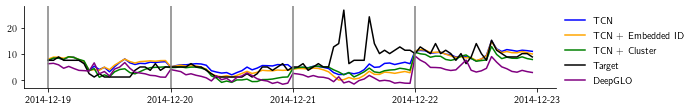

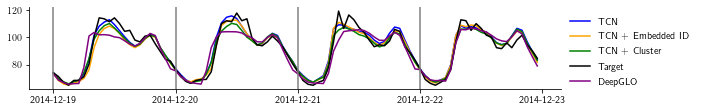

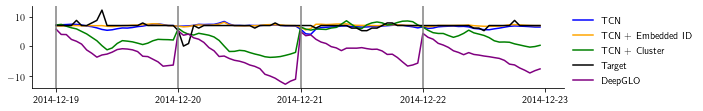

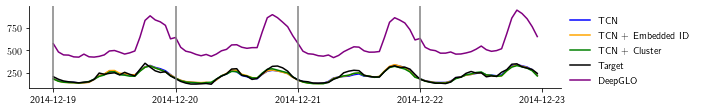

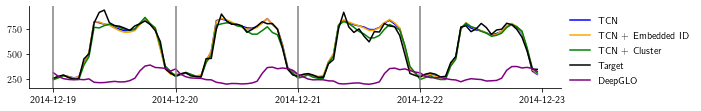

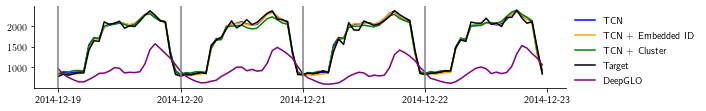

In [139]:
plot_length = 96
colors = ('blue', 'orange', 'green', 'black', 'purple')
with plt.style.context(ts_style):
    for i in range(len(ids)):
        plt.figure(figsize=(2*4.77, 1.5))
        for j, c in enumerate(df.columns):
            plt.plot(all_dfs[i][-plot_length:].index, all_dfs[i][c][-plot_length:].values, c=colors[j])
        x = pd.date_range(start="2014-12-19", freq="D", periods=4)
        t = pd.date_range(start="2014-12-19", freq="D", periods=5)
        x = x[-plot_length:]
        for xc in x:
            plt.axvline(x=xc, color='grey', linestyle='-')
        plt.xticks(t)
        plt.legend(["TCN", "TCN + Embedded ID", "TCN + Cluster", "Target", "DeepGLO"], loc='best', bbox_to_anchor=(1, 1), frameon=False)
        plt.savefig(f"Figures/all_models_pred_{i}.pdf", bbox_inches="tight")

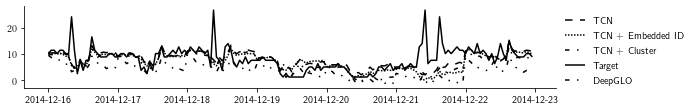

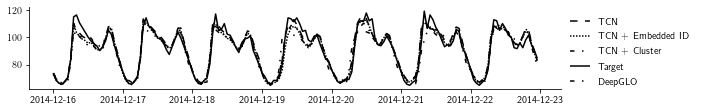

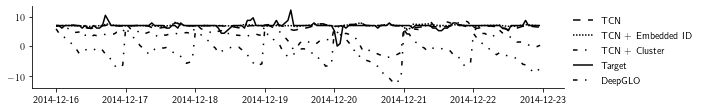

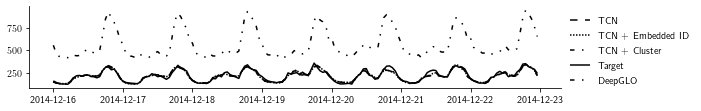

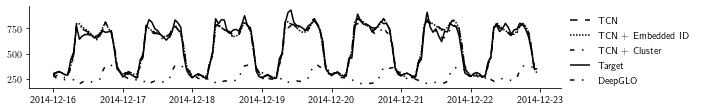

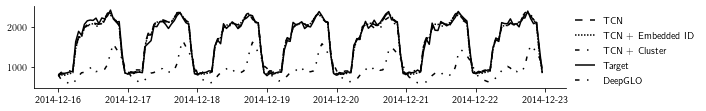

In [126]:
plot_length = 96
dashList = [(0, (5, 5)),(0, (1, 1)),(0, (3, 5, 1, 5)),(0, ()),(0, (3, 5, 1, 5, 1, 5))]
with plt.style.context(ts_style):
    for i in range(len(ids)):
        plt.figure(figsize=(2*4.77, 1.5))
        for j, c in enumerate(df.columns):
            plt.plot(all_dfs[i].index, all_dfs[i][c].values, color='black', linestyle=dashList[j])
        plt.legend(["TCN", "TCN + Embedded ID", "TCN + Cluster", "Target", "DeepGLO"], loc='best', bbox_to_anchor=(1, 1), frameon=False)

In [99]:
plot_length = 96
with plt.style.context(ts_style):
    for i in range(len(ids)):
        all_dfs[i].head()
        ax = all_dfs[i][-plot_length:].plot(figsize=(2*4.77, 1.5), legend=True, color=['k', 'k', 'k', 'k'], linestyle=[(0, (5, 5)), (0, (5, 5)), (0, (5, 5)), (0, (5, 5))])
        plt.plot(dglo_preds[ids[i],-plot_length:], color='black', linestyle= '-')
        x = pd.date_range(start="2014-12-16", freq="D", periods=7)
        for xc in x:
            ax.axvline(x=xc, color='grey', linestyle='-')
        x1, x2 = ax.get_xlim()
        ax.set_xlim((x1, x2 + 1))
        ax.legend(["TCN", "TCN + Embedded ID", "TCN + Cluster", "Target", "DeepGLO"], loc=7, frameon=False, bbox_to_anchor=(1.25, 0.5))
        #plt.savefig(f"Figures\pred_id_{ids[i]}.pdf", bbox_inches="tight")
        plt.show()

ValueError: Unrecognized linestyle: [(0, (5, 5)), (0, (5, 5)), (0, (5, 5)), (0, (5, 5))]

# Plot representation from models

In [16]:
model_dir = "Z:\TCN_clone\TCN\electricity\models"
model_names = [
    "e94106c6db6e44c88e497fe5062c0afd",
    "ce17bfb7d3594816a20faa55795a8084",
    "d48d5f0d9bb04edda06f7e3a532b1370",
    "192a0d0d02d146dfb3148b7af4e10c19",
    "0e61357a42ee434abd1c5fe170f3f2f4",
    "ee140872041044898f7cd02412975459",
    "b0dccaa25461401bb7c8e4daade97c79",
    "81f27dc04c334908a01ec85f6671ef17"
]
model_paths = [f"{os.path.join(model_dir, mn)}.pt" for mn in model_names]
model_paths

['Z:\\TCN_clone\\TCN\\electricity\\models\\e94106c6db6e44c88e497fe5062c0afd.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\ce17bfb7d3594816a20faa55795a8084.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\d48d5f0d9bb04edda06f7e3a532b1370.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\192a0d0d02d146dfb3148b7af4e10c19.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\0e61357a42ee434abd1c5fe170f3f2f4.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\ee140872041044898f7cd02412975459.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\b0dccaa25461401bb7c8e4daade97c79.pt',
 'Z:\\TCN_clone\\TCN\\electricity\\models\\81f27dc04c334908a01ec85f6671ef17.pt']

In [17]:
models = []
for MODEL_PATH in model_paths:
    args = pickle.load(open(f"{MODEL_PATH}__args.pkl", "rb"))
    model = TCN(
        num_layers=args.num_layers,
        in_channels=1,
        out_channels=1,
        residual_blocks_channel_size=[args.res_block_size]*args.num_layers,
        kernel_size=args.kernel_size,
        bias=args.bias,
        dropout=args.dropout,
        stride=1,
        leveledinit=args.leveledinit,
        embedding_dim=args.embedding_dim,
        embed=args.embed,
    )
    model.load_state_dict(torch.load(MODEL_PATH, map_location="cpu"))
    model.eval()
    models.append(model)
#print(models)

## Embedding layer of each model

In [18]:
embeddings = []
for model in models:
    ids = [i for i in range(370)]
    ids = torch.LongTensor(ids).to("cpu")
    embds = model.embedding(ids).detach().cpu().numpy()
    embeddings.append(embds)

## Visualize

In [19]:
mystyle = {
    "axes.spines.left": False,
    "axes.spines.right": False,
    "axes.spines.bottom": False,
    "axes.spines.top": False,
    "axes.grid": False,
    "xtick.bottom": False,
    "ytick.left": False,
}

In [20]:
with plt.style.context(mystyle):
    for embedding in embeddings[:2]:
        nc = embedding.shape[1]
        if embedding.shape[1] > 2:
            tsne = TSNE(n_components=2)
            embedding = tsne.fit_transform(embedding)
        #plt.figure()
        #plt.scatter(embedding[:,0], embedding[:,1], c="#00B0F0", edgecolor="black", linewidth=0.5)
        #plt.title(f"Embedding dim {nc}")
        #plt.show()
#"colors = ["#FFC000", "#00B0F0"]ø

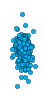

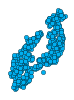

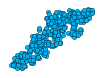

In [21]:
size=4.77/3
with plt.style.context(mystyle):
    plt.figure(figsize=(size, size))
    plt.scatter(embeddings[0][:,0], embeddings[0][:,1], s=20, c="#00B0F0", edgecolor="black", linewidth=0.3)
    plt.xticks([])
    plt.yticks([])
    plt.axis('scaled')
    #plt.title(f"Embedding dim {nc}")
    plt.savefig("electricity_learned_embedding_2.pdf")#, bbox_inches="tight")
    for embedding in embeddings[:2]:
        nc = embedding.shape[1]
        tsne = TSNE(n_components=2)
        embedding = tsne.fit_transform(embedding)
        plt.figure(figsize=(size, size))
        plt.scatter(embedding[:,0], embedding[:,1], s=20, c="#00B0F0", edgecolor="black", linewidth=0.3)
        plt.xticks([])
        plt.yticks([])
        plt.axis('scaled')
        #plt.title(f"Embedding dim {nc}")
        plt.savefig(f"electricity_learned_embedding_{nc}_tsne.pdf")#, bbox_inches="tight")

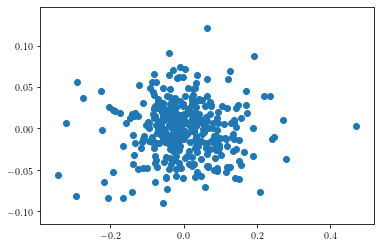

In [22]:
from sklearn.decomposition import PCA
pca = PCA(2)
embds = pca.fit_transform(embeddings[1])
plt.scatter(embds[:,0], embds[:,1])

In [23]:
s = """
e94106c6db6e44c88e497fe5062c0afd
ce17bfb7d3594816a20faa55795a8084
d48d5f0d9bb04edda06f7e3a532b1370
192a0d0d02d146dfb3148b7af4e10c19
0e61357a42ee434abd1c5fe170f3f2f4
ee140872041044898f7cd02412975459
b0dccaa25461401bb7c8e4daade97c79
81f27dc04c334908a01ec85f6671ef17
"""
s.replace("\n", "\",\"")

'","e94106c6db6e44c88e497fe5062c0afd","ce17bfb7d3594816a20faa55795a8084","d48d5f0d9bb04edda06f7e3a532b1370","192a0d0d02d146dfb3148b7af4e10c19","0e61357a42ee434abd1c5fe170f3f2f4","ee140872041044898f7cd02412975459","b0dccaa25461401bb7c8e4daade97c79","81f27dc04c334908a01ec85f6671ef17","'